In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV # 通过网格方式来搜索参数
from sklearn import tree
from matplotlib import pyplot as plt
import matplotlib
font = {
    'family':'SimHei',
    'weight':'bold',
    'size':12
}
matplotlib.rc("font", **font)
import seaborn as sns

In [28]:
data = pd.read_csv("表单1.csv")#导入数据集
features = ["文物编号","纹饰","类型","颜色"]
X = data[features]#设置待估Xy
y = data["表面风化"]
X.set_index("文物编号",inplace=True)#更改索引
features = ["纹饰","类型","颜色"]

c:\Users\Nucleon\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Nucleon\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


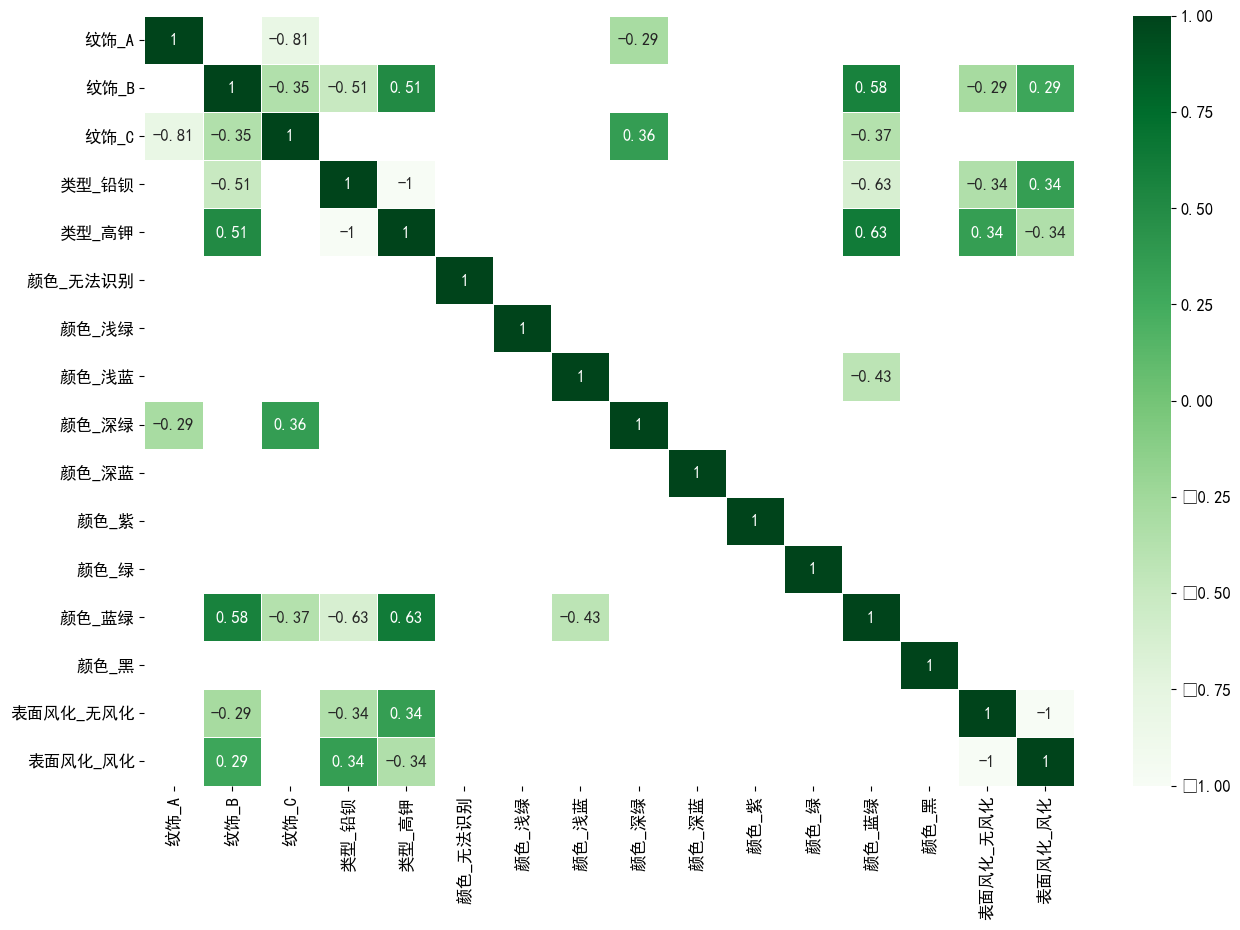

In [29]:
plt.figure(figsize=[15, 10])#生成热力图,初步观察变量相关情况
sns.heatmap(pd.get_dummies(data[["纹饰","类型","颜色","表面风化"]]).corr(method='spearman'),cmap="Greens",mask=abs(pd.get_dummies(data[["纹饰","类型","颜色","表面风化"]]).corr(method='spearman'))<0.279, linewidths=0.5, annot=True)
plt.show()

In [30]:
X = pd.get_dummies(X[features])

In [31]:

# 设置需要搜索的参数值，在这里寻找最优的决策树深度
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
model = tree.DecisionTreeClassifier()  # 注意：在这里不用指定参数
# GridSearchCV
clf = GridSearchCV(model, parameters, cv=5)   
clf.fit(X, y)
# 输出最好的参数以及对应的准确率
print ("best score is: %.4f"%clf.best_score_, "  best param: ",clf.best_params_,)


best score is: 0.7030   best param:  {'max_depth': 2}


In [32]:
model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(X, y)

[Text(0.5, 0.8333333333333334, '类型_铅钡 <= 0.5\ngini = 0.485\nsamples = 58\nvalue = [24, 34]\nclass = 风化'),
 Text(0.25, 0.5, '纹饰_B <= 0.5\ngini = 0.444\nsamples = 18\nvalue = [12, 6]\nclass = 无风化'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = 无风化'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 风化'),
 Text(0.75, 0.5, '颜色_绿 <= 0.5\ngini = 0.42\nsamples = 40\nvalue = [12, 28]\nclass = 风化'),
 Text(0.625, 0.16666666666666666, 'gini = 0.405\nsamples = 39\nvalue = [11, 28]\nclass = 风化'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 无风化')]

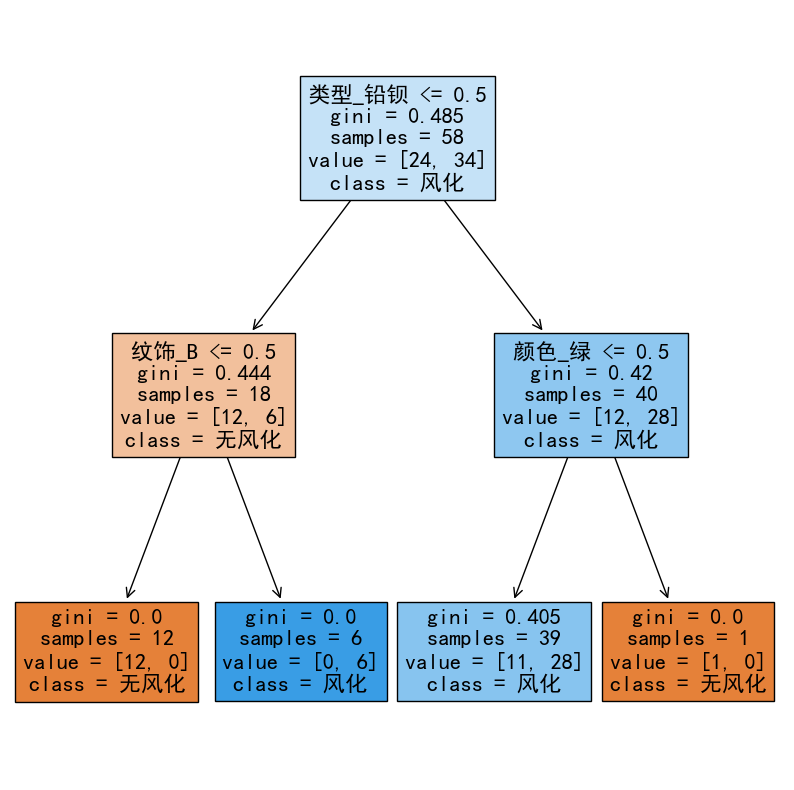

In [33]:
fig = plt.figure(figsize=(10,10))
class_names = ["无风化","风化"]
from sklearn.tree import plot_tree # 树图
plot_tree(
    model, 
    feature_names = X.columns,  
    class_names= class_names,
    filled=True,
)

# Save picture
#fig.savefig("decistion_tree.png")
